# Introduction

Tuberculosis (TB) is considered to be the second leading cause of death after HIV/AIDS. It infects humans through an airborne bacteria called Mycobacterium Tuberculosis. When active, TB manifests itself through various signs and symptoms, including prolonged cough, night sweats, shortness of breath, weight loss and fever.

Lymphoma is an ensemble of cancerous diseases which are potentially curable. However, in countries with huge tuberculosis (TB) burden, lymphoma patients can be suspected of having TB and receive treatment that they do not need, thus delaying treatment of the cancer. This is due to the similar symptoms both diseases share. 

The research reported here visualises and cleans textual clinical notes for both TB and lymphoma to be used for classification.


# Installing wordcloud library

In [1]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install sklearn
# import platform; print(platform.platform())
# import sys; print("Python", sys.version)
# import numpy; print("NumPy", numpy.__version__)
# import scipy; print("SciPy", scipy.__version__)
# import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-8-6.2.9200
Python 3.4.2 (v3.4.2:ab2c023a9432, Oct  6 2014, 22:15:05) [MSC v.1600 32 bit (Intel)]
NumPy 1.14.0
SciPy 0.19.1
Scikit-Learn 0.19.0


# Loading libraries

In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string

import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

print("Libraries loaded!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kyle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Libraries loaded!


# Generating cloud for patient case example

<b>Load cases</b>

In [3]:
import pandas as pd

df1= pd.read_csv('TB.csv',encoding='latin-1')
df2= pd.read_csv('lymphBig.csv',encoding='latin-1')
#df1=df1.drop(['Notes'], axis=1)
#df1=df1.dropna()

In [4]:
#df1.Label.apply(int)
df1.tail()

,Unnamed: 0,PII,Title,Case,Label
541,5956,S0022510X13022363,Multifocal tuberculosis revealed by cerebellar...,Purpose: To describe the characteristics of m...,0
542,5984,S2444382416300773,Lower gastrointestinal bleeding as a presentat...,Tests revealed 7.6g/dL hemoglobin levels with ...,0
543,6030,S0019483215007415,Marfan Syndrome with type-1 diabetes and pulmo...,A 17-year-old male presented to our hospital i...,0
544,6060,S0929664612003373,A rare case of the coexistence of latent tuber...,A 35-year-old man with fever and night sweatin...,0
545,6080,S1473309902003018,Nearly 70% of tuberculosis cases remain undete...,The rate of progress in case finding between ...,0


In [4]:
#df1.Case[10]

In [5]:
df2.tail()

,Unnamed: 0,PII,Title,Case
760,3998,S0264-410X(09)01311-5,Risk of lymphoma and leukaemia after bacille C...,2 Materials and method 2.1 Research strategy...
761,4011,S1529-1839(10)00107-7,Non-Hodgkin's lymphoma presenting with multipl...,Case description Ophthalmic evaluation A 50-...
762,4021,S0022-202X(15)34748-5,IRF4 Gene Rearrangements Define a Subgroup of ...,Results Patients and samples Sixty-seven sam...
763,4033,S0399-8320(10)00349-0,Enteropathy-associated T-cell lymphoma: A revi...,"Background In 1855, Sir W. Gull made the firs..."
764,4034,S1748-6815(17)30294-2,Unusual presentation of primary cutaneous foll...,PC-FCL is an indolent lymphoma with progressiv...


In [6]:
#df2.Case[0]

<b>View cloud for one case</b>


Save word cloud as image

In [8]:
# Save the image in the img folder:
#wordcloud.to_file("first_review.png")

In [6]:
#TB
textTB = " ".join(case for case in df1.Case)
print ("There are %d words in the combination of all TB cases." % len(textTB))

There are 1695553 words in the combination of all TB cases.


<b>Combine all cases</b>

In [7]:
#Lymph
textLymph = " ".join(case for case in df2.Case)
print ("There are %d words in the combination of all Lymphoma cases." % len(textLymph))

There are 1923056 words in the combination of all Lymphoma cases.


__Create cloud__

### Tokenize

In [8]:
#TB
import nltk
#nltk.download('punkt')
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import string
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

# fit our vectorizer. This will take a while depending on your computer. 

vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
# this could take a while
vect.fit(df1.Case.values)
# get the column names
vect.get_feature_names()

['a',
 'abdomen',
 'abdominal',
 'abdominopelvic',
 'able',
 'abnormal',
 'abnormalities',
 'abnormality',
 'about',
 'above',
 'abs',
 'abscess',
 'abscesses',
 'abscessus',
 'absence',
 'absent',
 'absolute',
 'abuse',
 'ac',
 'accepted',
 'access',
 'accompanied',
 'accordance',
 'according',
 'accordingly',
 'account',
 'acf',
 'achieved',
 'acid',
 'across',
 'active',
 'activities',
 'activity',
 'acute',
 'ada',
 'added',
 'addison',
 'addition',
 'additional',
 'additionally',
 'address',
 'adenopathy',
 'adenosine',
 'adherence',
 'adherent',
 'adhesion',
 'adhesions',
 'adjacent',
 'adjusted',
 'administered',
 'administration',
 'administrative',
 'admission',
 'admitted',
 'adnexal',
 'adrenal',
 'adult',
 'adults',
 'advanced',
 'adverse',
 'advised',
 'ae',
 'afb',
 'afebrile',
 'affect',
 'affected',
 'africa',
 'african',
 'after',
 'again',
 'against',
 'agar',
 'agarose',
 'age',
 'aged',
 'agents',
 'aggravated',
 'ago',
 'aids',
 'ain',
 'air',
 'airway',
 'al',
 'a

In [19]:
#TB
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better)
# this could take a while
vect.fit(df2.Case.values)
# get the column names
vect.get_feature_names()

['a',
 'abdomen',
 'abdominal',
 'abnormal',
 'abnormalities',
 'abnormality',
 'abnormally',
 'about',
 'above',
 'abscess',
 'abscesses',
 'absence',
 'absent',
 'absolute',
 'abundant',
 'abuse',
 'abvd',
 'ac',
 'accompanied',
 'accomplished',
 'accordance',
 'according',
 'accumulation',
 'achalasia',
 'ache',
 'achieve',
 'achieved',
 'achieving',
 'acid',
 'acquired',
 'acromegaly',
 'across',
 'active',
 'activities',
 'activity',
 'acuity',
 'acute',
 'adc',
 'addition',
 'additional',
 'additionally',
 'adenocarcinoma',
 'adenoma',
 'adenopathies',
 'adenopathy',
 'adipose',
 'adjacent',
 'adjuvant',
 'administered',
 'administration',
 'admission',
 'admitted',
 'admixed',
 'adnexa',
 'adrenal',
 'adriamycin',
 'advanced',
 'advised',
 'ae',
 'affected',
 'affecting',
 'aforementioned',
 'after',
 'afterwards',
 'again',
 'against',
 'age',
 'agent',
 'aggregates',
 'aggressive',
 'ago',
 'air',
 'al',
 'alanine',
 'albumin',
 'alcl',
 'alcls',
 'alcohol',
 'alive',
 'alk',


In [49]:
df1.Label="1"
df2.Label="2"
dfbig=pd.concat([df1,df2])
dfbig.head()

,Case,Label,PII,Title,Unnamed: 0
0,Case report An African14-year-old girl was ad...,1,S1930043318302334,Pelvic tuberculosis: a forgotten diagnosis  c...,0
1,"Case presentation A 26-year-old woman, para 1...",1,S193004331830339X,Rare radiological features of abdominopelvic t...,1
2,Case report A 12?year old boy presented with ...,1,S1110663818300041,Isolated nasopharyngeal tuberculosis in a 12?y...,4
3,Case report A 43-year-old man was admitted fo...,1,S2214442018300810,A case report: Addison disease caused by adren...,5
4,2 Presentation of case A 93-year-old Japanese...,1,S2210261218302311,Rare case of sacrococcygeal tuberculosis mimic...,7


### Visualise word occurence

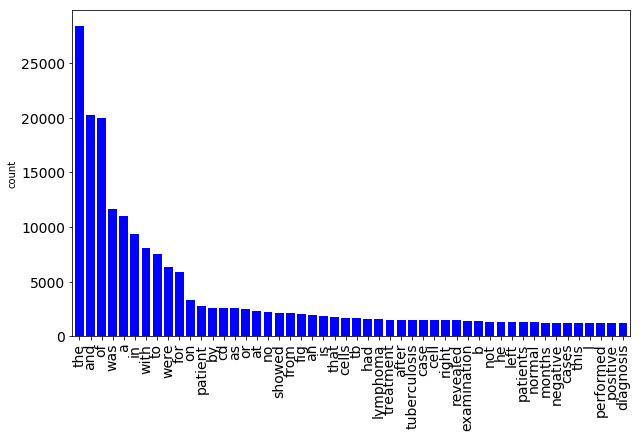

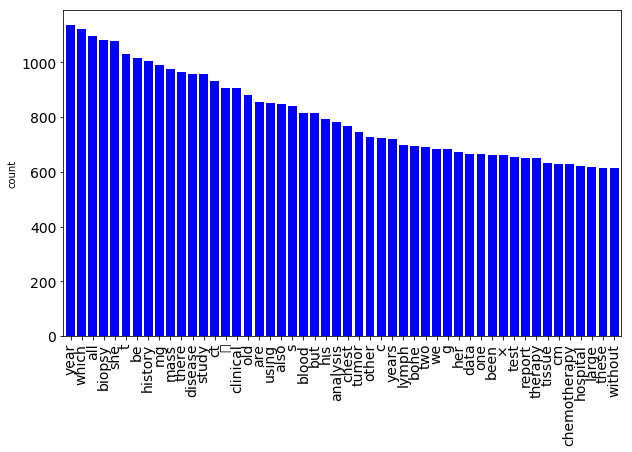

In [9]:
def plotFeatures():   
    neg_doc_matrix = vect.transform(df1.Case)
    pos_doc_matrix = vect.transform(df2.Case)
    neg_tf = np.sum(neg_doc_matrix,axis=0)
    pos_tf = np.sum(pos_doc_matrix,axis=0)
    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))

    term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
    term_freq_df.columns = ['negative', 'positive']
    term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
    term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

    #Create a series from the sparse matrix
    d = pd.Series(term_freq_df.total, 
                  index = term_freq_df.index).sort_values(ascending=False)
    ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
    ax.title.set_size(18)
    plt.ylabel('count')
    plt.show()
    
plotFeatures()

In [32]:
def visualise(vec):
   
    vec.fit(dfbig.Case)

    neg_train = df1.Case
    pos_train = df2.Case
    neg_doc_matrix = vec.transform(neg_train)
    pos_doc_matrix = vec.transform(pos_train)
    neg_tf = np.sum(neg_doc_matrix,axis=0)
    pos_tf = np.sum(pos_doc_matrix,axis=0)

    from scipy.stats import hmean
    from scipy.stats import norm
    def normcdf(x):return norm.cdf(x, x.mean(), x.std())

    neg = np.squeeze(np.asarray(neg_tf))
    pos = np.squeeze(np.asarray(pos_tf))
    term_freq_df2 = pd.DataFrame([neg,pos],columns=vec.get_feature_names()).transpose()
    term_freq_df2.columns = ['negative', 'positive']
    term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
    term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
    term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
    term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
    term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
    term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
    
    return term_freq_df2.sort_values(by='pos_freq_pct_normcdf', ascending=False).iloc[:20]
cvec = CountVectorizer(max_features=10000)
visualise(cvec)

,negative,positive,total,pos_rate,pos_freq_pct,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
to,3823,716,4539,0.157744,0.013425,0.454771,1.000000,0.625213
was,5613,1156,6769,0.170779,0.021675,0.473151,1.000000,0.642366
with,3534,984,4518,0.217795,0.018450,0.539643,1.000000,0.700998
for,3081,515,3596,0.143215,0.009656,0.434398,1.000000,0.605687
the,13888,2780,16668,0.166787,0.052125,0.467514,1.000000,0.637151
were,3286,478,3764,0.126993,0.008963,0.411858,1.000000,0.583427
and,9514,2154,11668,0.184607,0.040388,0.492714,1.000000,0.660158
of,9547,2126,11673,0.182130,0.039863,0.489206,1.000000,0.657002
in,4631,919,5550,0.165586,0.017231,0.465819,1.000000,0.635575
patient,1285,353,1638,0.215507,0.006619,0.536417,1.000000,0.698270


### Remove non-useful words

In [35]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(['TB','tuberculosis','study','patient','patients','case','used','well','patient','using','treated','follow','followed','cases','report','data','one','reported','based','report','started','including','associated','two','day','complaint','examination','showed','seen','performed','figure','fig','cm','months', 'time','presented','revealed','mm', 'found','month', 'week','weeks', 'symptoms','year','years','finding','history','patient','clinic','hospital','presents','presented','old'])

vect = CountVectorizer(max_features = 10000, 
                       tokenizer = tokenizer_better, 
                       stop_words = stopwords)
visualise(vect)

,negative,positive,total,pos_rate,pos_freq_pct,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
examination,615,142,757,0.187583,0.003981,0.498762,1.0,0.665565
biopsy,297,153,450,0.340000,0.004289,0.698646,1.0,0.822592
tumor,69,152,221,0.687783,0.004261,0.956853,1.0,0.977951
normal,602,152,754,0.201592,0.004261,0.517955,1.0,0.682438
cd,112,560,672,0.833333,0.015699,0.986631,1.0,0.993270
left,570,198,768,0.257812,0.005551,0.594123,1.0,0.745392
cell,171,235,406,0.578818,0.006588,0.910031,1.0,0.952897
lymphoma,17,317,334,0.949102,0.008887,0.995513,1.0,0.997751
cells,303,268,571,0.469352,0.007513,0.832699,1.0,0.908713
l,435,154,589,0.261460,0.004317,0.598975,1.0,0.749199


NameError: name 'text' is not defined

### View resulting cloud

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

stopwords = set(STOPWORDS)
stopwords.update(['study','showed','patient','patients','case','used','patient','using','follow','followed','cases','report','data','reported','based','report','including','examination','showed','seen','performed','figure','fig','time','presented','revealed','symptoms','year','years','finding','patient','clinic','hospital','presents','presented'])

vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(dfbig.Case)
#print(X)
true_k = 2
true_labels=None
sil=0
#Choose k

kVals=[2,5,10,20,30,40,50,75,100,150, 250, 350, 500]
for k in kVals:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)
    labels=model.labels_
    s= metrics.silhouette_score(dfbig.Case, labels, metric='euclidean')
    
    if s>=sil:
        print("New Silhouette: %f @ %d",(s,k))
        sil=s
        true_k=k

print("Silhouette Coefficient: %0.3f @%d"
      % (sil,true_k))
    
#Create k clusters
#Evaluate Silhouette

c:\python34\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


ValueError: could not convert string to float: 'PC-FCL is an indolent lymphoma with progressive growth and rare dissemination to extracutaneous sites and usually affects the skin of the scalp, forehead, and trunk. 4  '

c:\python34\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Top terms per cluster:
      data_index  cluster
1306         760        0
1307         761        1
1308         762        0
1309         763        0
1310         764        0
Cluster 0:
 tb
 lymphoma
 tuberculosis
 cell
 treatment


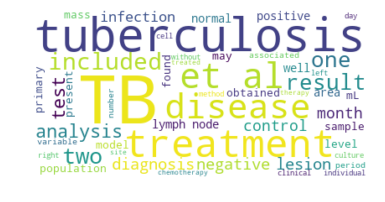

Cluster 1:
 right
 left
 normal
 cells
 mass


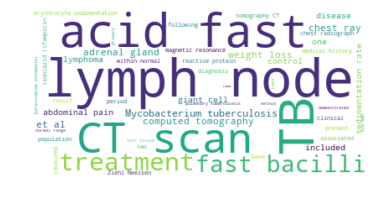

Silhouette Coefficient: 0.012


In [74]:


stopwords = set(STOPWORDS)
stopwords.update(['study','showed','patient','patients','case','used','patient','using','follow','followed','cases','report','data','reported','based','report','including','examination','showed','seen','performed','figure','fig','time','presented','revealed','symptoms','year','years','finding','patient','clinic','hospital','presents','presented'])

vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(dfbig.Case)
#print(X)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

cluster_map = pd.DataFrame()
cluster_map['data_index'] = dfbig.index.values
cluster_map['cluster'] = model.labels_
labels=model.labels_

print(cluster_map.tail())
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind])
   
    # Generate a word cloud image
    thiscluster=cluster_map[cluster_map.cluster == i]
    thiscluster=dfbig.iloc[thiscluster.data_index]
    
    text = " ".join(review for review in thiscluster.Case)

    wordcloud = WordCloud(background_color="white",max_words=50, stopwords=stopwords).generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='euclidean'))

In [72]:
# #Affinity Propagation

# print(__doc__)

# from sklearn.cluster import AffinityPropagation
# from sklearn import metrics
# from sklearn.datasets.samples_generator import make_blobs
# # 
# # #############################################################################
# vectorizer = TfidfVectorizer(stop_words=stopwords)
# X = vectorizer.fit_transform(dfbig.Case)
# labels_true=pd.Series.as_matrix(dfbig.Label)

# # #############################################################################
# # Compute Affinity Propagation
# af = AffinityPropagation(preference=-50).fit(X)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_

# n_clusters_ = len(cluster_centers_indices)

# print('Estimated number of clusters: %d' % n_clusters_)
# #print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# #print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# #print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"% metrics.adjusted_rand_score(labels_true, labels))
# #print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
# #print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# # #############################################################################
# # Plot result
# import matplotlib.pyplot as plt
# from itertools import cycle

# plt.close('all')
# plt.figure(1)
# plt.clf()

# colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# for k, col in zip(range(n_clusters_), colors):
#     class_members = labels == k
#     cluster_center = X[cluster_centers_indices[k]]
#     plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
#     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#              markeredgecolor='k', markersize=14)
#     for x in X[class_members]:
#         plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()